In [38]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
import IPython.display as display
import cv2
import json
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [39]:
def find_img_in_test_labels(name):
    name = name.split("/")[-1]
    for image in test_images_label:
        if image['name'] == name:
            return image
    return None

# ***Read from TfRecords File***



In [40]:
tf.reset_default_graph()

In [41]:
sess = tf.InteractiveSession()

In [42]:
### IMPORTANT : First you have to unzip the tfRecord to import! ###

In [43]:

tfrecord_path = '../resources/test.tfrecords'
dataset = tf.data.TFRecordDataset(tfrecord_path)

In [44]:
def decode(serialized_example):
    """
    Parses an image and label from the given `serialized_example`.
    It is used as a map function for `dataset.map`
    """
    IMAGE_SHAPE = (128,128,3)

    # 1. define a parser
    features = tf.parse_single_example(
        serialized_example,
        # Defaults are not specified since both keys are required.
        features={
            'image': tf.FixedLenFeature([], tf.string),
            'label': tf.FixedLenFeature([], tf.string),
        })

    # 2. Convert the data
    image = tf.decode_raw(features['image'], tf.float32)
    label = features['label']

    # 3. reshape
    image = tf.convert_to_tensor(tf.reshape(image, IMAGE_SHAPE))
    
    return image, label


In [45]:
def normalize(image, label):
    """Convert `image` from [0, 255] -> [-0.5, 0.5] floats."""
    image = tf.cast(image, tf.float32) * (1. / 255)
    return image, label

In [46]:
# Parse the record into tensors with map. 
# map takes a Python function and applies it to every sample.
dataset = dataset.map(decode)

In [47]:
dataset = dataset.map(normalize)
batch_size = 100
dataset = dataset.batch(batch_size)

In [48]:
# Creating an iterator
iterator = dataset.make_one_shot_iterator()
image_batch, label_batch = iterator.get_next()

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


In [49]:
image_batch, label_batch = sess.run([image_batch, label_batch])
print(image_batch.shape)
print(label_batch.shape)

(100, 128, 128, 3)
(100,)


In [50]:
label_batch

array([b'daytime', b'night', b'daytime', b'daytime', b'daytime', b'night',
       b'daytime', b'night', b'daytime', b'daytime', b'daytime',
       b'daytime', b'night', b'daytime', b'daytime', b'night', b'night',
       b'night', b'night', b'daytime', b'daytime', b'daytime', b'daytime',
       b'night', b'night', b'night', b'daytime', b'night', b'night',
       b'night', b'daytime', b'night', b'daytime', b'night', b'night',
       b'daytime', b'daytime', b'daytime', b'night', b'daytime',
       b'daytime', b'night', b'daytime', b'night', b'daytime', b'night',
       b'night', b'night', b'night', b'night', b'daytime', b'night',
       b'night', b'daytime', b'daytime', b'daytime', b'night', b'night',
       b'daytime', b'night', b'night', b'night', b'night', b'night',
       b'night', b'daytime', b'daytime', b'daytime', b'daytime', b'night',
       b'daytime', b'night', b'night', b'night', b'daytime', b'night',
       b'daytime', b'daytime', b'daytime', b'night', b'night', b'daytime',
  

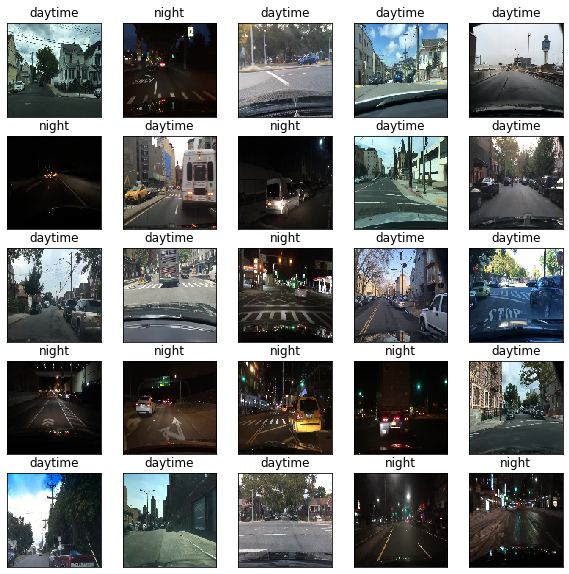

In [51]:
number_of_images = 5


plt.figure(1, figsize=(number_of_images*2,number_of_images*2))
for ind, i in enumerate(range(number_of_images**2)):
    plt.subplot(number_of_images,number_of_images,i+1)
    plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
    plt.imshow(image_batch[i])
    plt.title(label_batch[i].decode("utf-8"))

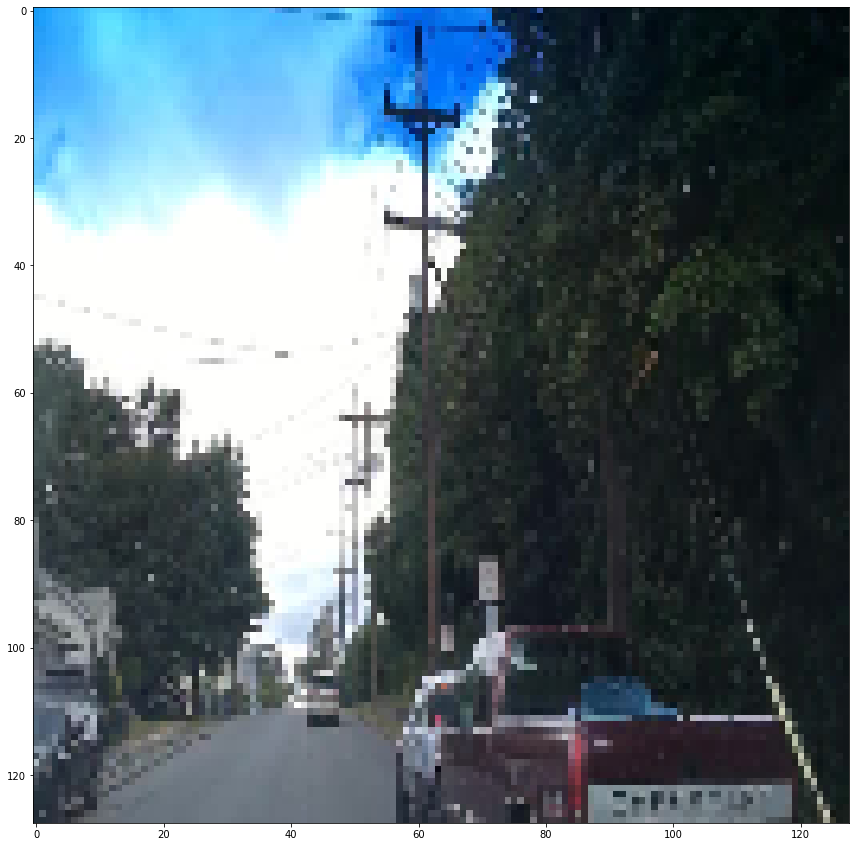

In [60]:
plt.figure(figsize=(15,15))
plt.imshow(image_batch[20])

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(label_batch)[0].value_counts().plot('bar')

In [1]:
!ls ../resources/bdd100k/labels


bdd100k_labels_images_train.json bdd100k_labels_images_val.json


In [ ]:
import json

In [ ]:
with open("../resources/bdd100k/labels/bdd100k_labels_images_train.json") as f:
    x = json.load(f)

In [2]:
import pandas as pd

In [4]:
df = pd.read_json('../resources/bdd100k/labels/bdd100k_labels_images_val.json')

In [30]:
from collections import Counter

In [32]:
def get_category(l: list):
    return Counter([i['category'] for i in l])


In [56]:
get_category(df.labels.iloc[20])

Counter({'traffic light': 9,
         'traffic sign': 4,
         'person': 1,
         'rider': 1,
         'bike': 1,
         'car': 10,
         'drivable area': 1,
         'lane': 2})

In [37]:
labels

NameError: name 'labels' is not defined